In [1]:
import json
import os
import math
import librosa

In [2]:
with open('data_finaloriginal.json', "r") as f:
    data1 = json.load(f)
    
x1 = data1['mfcc']
y1 = data1['labels']

In [3]:
with open('data_final.json', "r") as f:
    data2 = json.load(f)
    
x2 = data2['mfcc']
y2 = data2['labels']

In [4]:
import numpy as np

Xargs = (np.array(x1), np.array(x2))
yargs = (np.array(y1), np.array(y2))

In [5]:
X = np.concatenate(Xargs)
y = np.concatenate(yargs)

In [6]:
import gc

del data1
del x1
del y1
del data2
del x2
del y2
del Xargs
del yargs

gc.collect()

0

In [7]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import random
import librosa
import math

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]
input_shape = (X_train.shape[1], X_train.shape[2], 1)


In [9]:
input_shape

(130, 13, 1)

In [17]:
import os
import fnmatch
import numpy as np
import string
import time

from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [32]:
# input with shape of height=32 and width=128 
inputs = Input(shape=input_shape)

conv_1 = Conv2D(32, (3, 3), activation = 'relu')(inputs)
pool_1 = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv_1)
batch_norm_1 = BatchNormalization()(pool_1)

conv_2 = Conv2D(32, (3, 3), activation = 'relu')(batch_norm_1)
pool_2 = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv_2)
batch_norm_2 = BatchNormalization()(pool_2)

conv_3 = Conv2D(32, (2, 2), activation = 'relu')(batch_norm_2)
pool_3 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_3)
batch_norm_3 = BatchNormalization()(pool_3)

squeezed = Lambda(lambda x: tf.squeeze(x, 2))(batch_norm_3)

# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(blstm_1)

flat = keras.layers.Flatten()(blstm_2)
dense = Dense(64, activation='relu')(flat)
dropout = keras.layers.Dropout(0.3)(dense)

outputs = Dense(10, activation = 'softmax')(dropout)

act_model = Model(inputs, outputs)
act_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 130, 13, 1)]      0         
                                                                 
 conv2d_56 (Conv2D)          (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 64, 6, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_31 (Bat  (None, 64, 6, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 31, 2, 32)        0   

In [33]:
act_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = act_model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=75)


test_loss, test_acc = act_model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/75
375/375 [==============================] - 37s 82ms/step - loss: 1.5871 - accuracy: 0.4417 - val_loss: 1.1830 - val_accuracy: 0.5831
Epoch 2/75
375/375 [==============================] - 32s 86ms/step - loss: 1.2256 - accuracy: 0.5655 - val_loss: 1.0078 - val_accuracy: 0.6505
Epoch 3/75
375/375 [==============================] - 31s 83ms/step - loss: 1.1184 - accuracy: 0.6076 - val_loss: 0.9080 - val_accuracy: 0.6819
Epoch 4/75
375/375 [==============================] - 31s 83ms/step - loss: 1.0313 - accuracy: 0.6370 - val_loss: 0.8782 - val_accuracy: 0.6979
Epoch 5/75
375/375 [==============================] - 31s 84ms/step - loss: 0.9639 - accuracy: 0.6688 - val_loss: 0.8177 - val_accuracy: 0.7200
Epoch 6/75
375/375 [==============================] - 36s 96ms/step - loss: 0.8985 - accuracy: 0.6921 - val_loss: 0.7590 - val_accuracy: 0.7430
Epoch 7/75
375/375 [==============================] - 33s 87ms/step - loss: 0.8353 - accuracy: 0.7167 - val_loss: 0.7200 - val_accuracy:

375/375 [==============================] - 41s 109ms/step - loss: 0.1523 - accuracy: 0.9482 - val_loss: 0.4233 - val_accuracy: 0.8818
Epoch 58/75
375/375 [==============================] - 40s 106ms/step - loss: 0.1476 - accuracy: 0.9498 - val_loss: 0.3753 - val_accuracy: 0.8875
Epoch 59/75
375/375 [==============================] - 43s 116ms/step - loss: 0.1388 - accuracy: 0.9524 - val_loss: 0.3662 - val_accuracy: 0.8985
Epoch 60/75
375/375 [==============================] - 39s 105ms/step - loss: 0.1400 - accuracy: 0.9513 - val_loss: 0.3707 - val_accuracy: 0.8955
Epoch 61/75
375/375 [==============================] - 39s 104ms/step - loss: 0.1352 - accuracy: 0.9528 - val_loss: 0.3537 - val_accuracy: 0.8989
Epoch 62/75
375/375 [==============================] - 39s 104ms/step - loss: 0.1217 - accuracy: 0.9592 - val_loss: 0.4095 - val_accuracy: 0.8905
Epoch 63/75
375/375 [==============================] - 39s 104ms/step - loss: 0.1368 - accuracy: 0.9541 - val_loss: 0.3776 - val_accurac

In [35]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8944522142410278


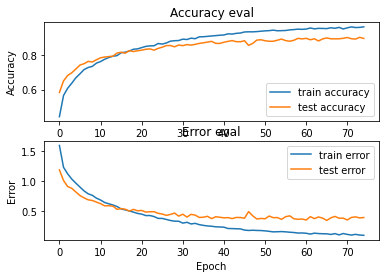

In [36]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
plot_history(history)